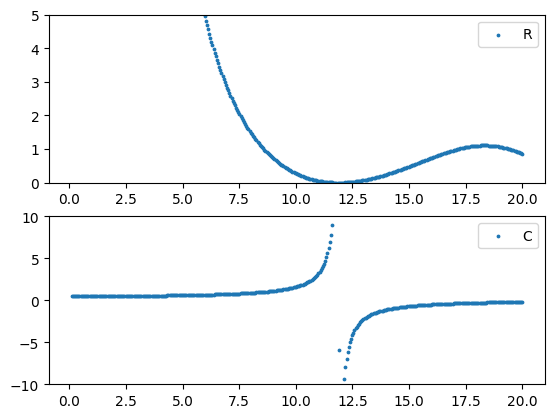

In [2]:
import skrf as rf
import numpy as np
import matplotlib.pyplot as plt


crkt = rf.Network('data/GJM1555C1HR50BB01_DC0V_25degC_series.s2p')
crkt.frequency.unit = 'ghz'

freq = crkt.frequency.f_scaled
f = crkt.frequency.f

w = 2 * np.pi * crkt.frequency.f

Z = np.array([])

for a in crkt.a:
    z = np.triu(a)[0,1]
    Z = np.append(Z, z)

Y = 1/Z
R = 1/Y.real
C = Y.imag / w

plt.subplot(211)
plt.scatter(freq, R/1000, label='R', s=3)
plt.legend()
plt.ylim(0, 5)

plt.subplot(212)
plt.scatter(freq, C/1e-12, label='C', s=3)

plt.legend()
plt.ylim(-10, 10)
plt.show()


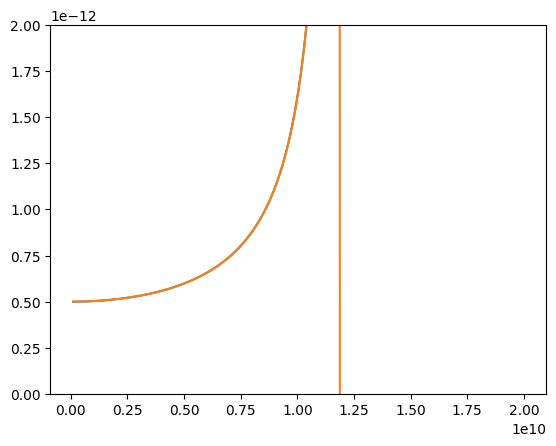

In [3]:
csv_data = np.loadtxt(
    'data/GJM1555C1HR50BB01_InProduction.csv', 
    delimiter=",", 
    skiprows=6, 
    usecols=(0,1)
).T

plt.plot(csv_data[0], csv_data[1])
plt.plot(f, C)

plt.ylim(0, 2e-12)
plt.show()

/home/nakanishi/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[ 3.25903673e+04 -9.34777826e+03 -6.87650490e+02 -1.01771883e+03
  9.00000000e-02 -3.57674865e+03]


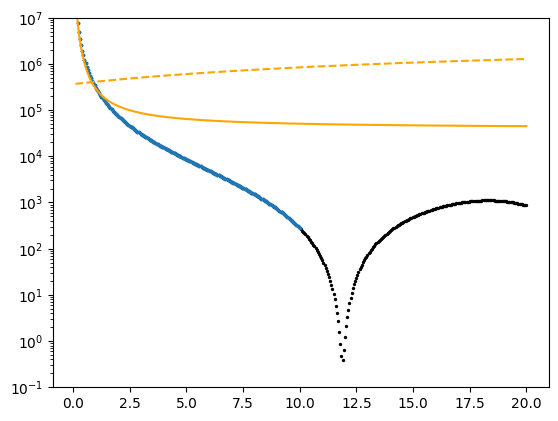

In [45]:
from scipy.optimize import curve_fit

def fitting_R(x, a, b, c, d, e, f):
    # return a * np.exp(b*f + c) / (f + d)
    # return a * np.exp( np.tan(b*f + c) + d )
    # return a * np.sin( b*f ) / f
    return a * np.exp( (b + c*x)/(d + f*x) )

i = 0
j = 200

p0 = [ 3e4, -5e3, -5e2, -2e3, 9e-2, -1e2]
popt, pcov = curve_fit(fitting_R, freq[i:j], R[i:j], p0=p0, maxfev=int(1e6))
# popt, pcov = curve_fit(fitting_R, freq, R, maxfev=int(1e5))

print(popt)

# plt.subplot(211)
plt.scatter(freq, R, s=2, c='black')
plt.scatter(freq[i:j], R[i:j], s=3)
plt.plot(freq, fitting_R(freq, *popt), c='orange')
plt.plot(freq, fitting_R(freq, *p0), c='orange', linestyle='dashed')

# plt.ylim(1e-1, 1e4)
plt.ylim(1e-1, 1e7)
plt.yscale('log')

# plt.subplot(212)
# plt.plot(freq, R - fitting_R(freq, *popt), c='green', linestyle='dashed')
# plt.ylim(-1e4, 1e4)

plt.savefig('a.png')
plt.show()
